In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define transition probability matrix (bus stops example)
T = np.array([
    [0.25, 0.35, 0.40, 0.00],
    [0.55, 0.00, 0.00, 0.45],
    [0.00, 0.20, 0.60, 0.20],
    [0.30, 0.30, 0.20, 0.20]
])

# Define state names
states = ["Stop 1", "Stop 2", "Stop 3", "Stop 4"]

# Simulation parameters
n_steps = 1000  # number of transitions
current_state = 2  # start from Stop 3 (index 2 because Python is 0-based)
visited_states = [current_state]

# Simulate transitions
for _ in range(n_steps):
    current_state = np.random.choice([0, 1, 2, 3], p=T[current_state])
    visited_states.append(current_state)

# Convert visited state indices to names
visited_state_names = [states[i] for i in visited_states]
print("First 20 visited states:", visited_state_names[:20])


First 20 visited states: ['Stop 3', 'Stop 3', 'Stop 2', 'Stop 1', 'Stop 1', 'Stop 3', 'Stop 3', 'Stop 2', 'Stop 1', 'Stop 3', 'Stop 3', 'Stop 2', 'Stop 4', 'Stop 2', 'Stop 1', 'Stop 1', 'Stop 2', 'Stop 4', 'Stop 1', 'Stop 3']


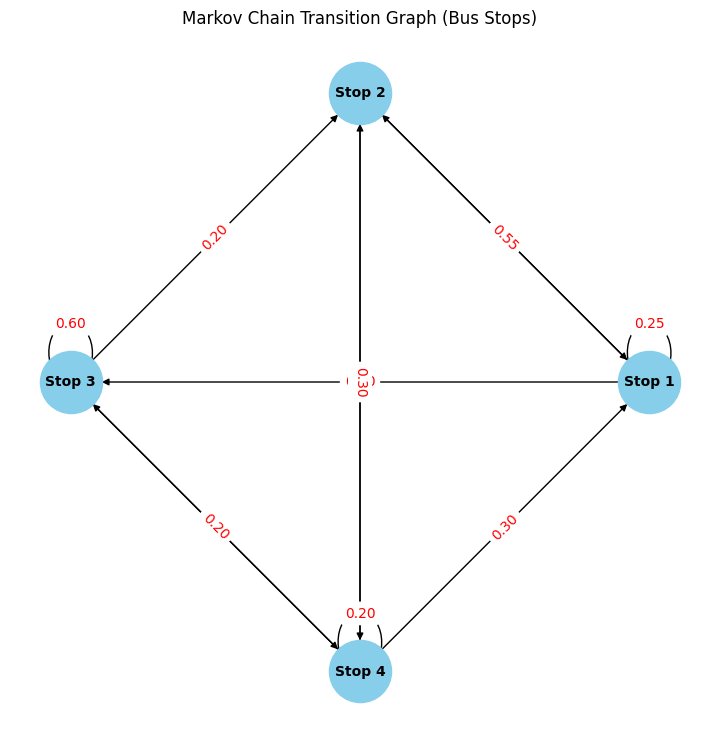

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (probabilities)
for i in range(len(states)):
    for j in range(len(states)):
        if T[i, j] > 0:
            G.add_edge(states[i], states[j], weight=T[i, j])

# Draw the graph
pos = nx.circular_layout(G)  # positions nodes in a circle
edges = G.edges(data=True)

# Extract edge weights for labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}

plt.figure(figsize=(7, 7))
nx.draw(
    G, pos, with_labels=True, node_size=2000, node_color="skyblue",
    font_size=10, font_weight="bold", arrows=True
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

plt.title("Markov Chain Transition Graph (Bus Stops)")
plt.show()
